In [7]:
library("dplyr")
library("ggplot2")
library("ggrepel")

In [8]:
ytdata <- read.csv(file="USvideos.csv", header=TRUE, sep=",")
#remove duplicates
ytdata <- ytdata[!duplicated(ytdata$video_id, fromLast = TRUE),]

In [12]:
video_count <- data.frame(sort(table(ytdata$channel_title), decreasing = TRUE))
names(video_count)<- c("Channel", "Trending_Video_Count")

In [10]:
view_count <- aggregate(ytdata$views, by=list(Channel=ytdata$channel_title), FUN=sum)
names(view_count)[2] <- "Total_Views"
names(view_count)
bubble_df <- merge(video_count,view_count, by="Channel")
head(bubble_df[order(bubble_df$Trending_Video_Count, bubble_df$Total_Views, decreasing=TRUE),])
head(bubble_df[order(bubble_df$Total_Views, bubble_df$Trending_Video_Count, decreasing=TRUE),])

[1] "Channel"     "Total_Views"

,Channel,Trending_Video_Count,Total_Views
636,ESPN,84,48756191
1944,TheEllenShow,72,96442935
1925,The Tonight Show Starring Jimmy Fallon,72,84220904
972,Jimmy Kimmel Live,70,101962900
1893,The Late Show with Stephen Colbert,58,43867016
1380,Netflix,56,51264788


,Channel,Trending_Video_Count,Total_Views
869,ibighit,9,271753404
369,ChildishGambinoVEVO,1,225211923
1218,Marvel Entertainment,15,203573220
583,Dude Perfect,11,191936709
598,Ed Sheeran,5,169017417
1009,jypentertainment,7,168249527


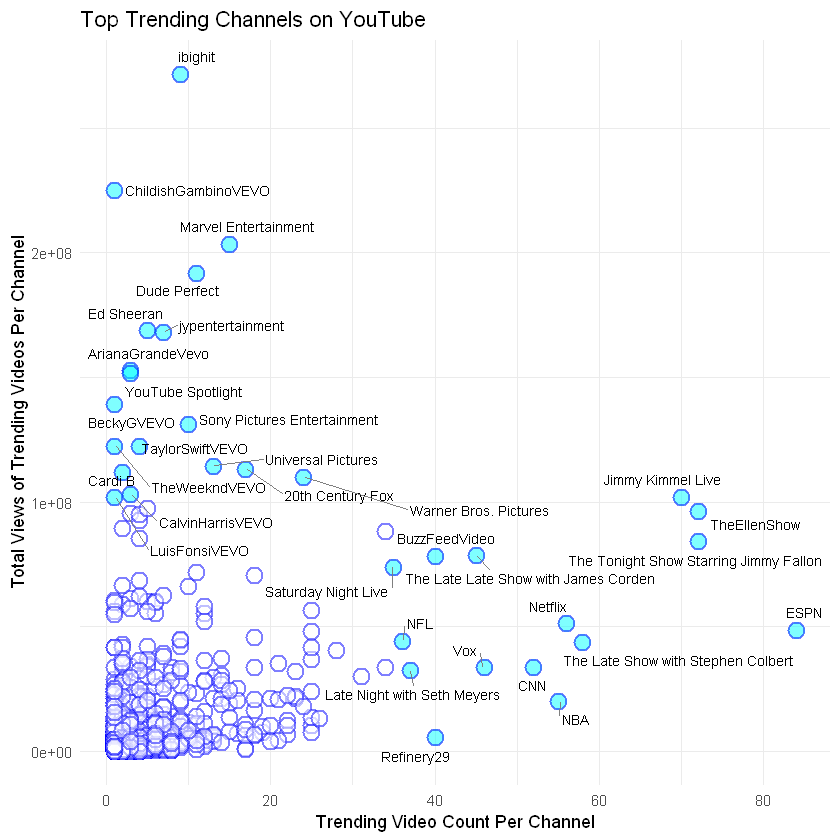

In [11]:
ggplot(bubble_df, aes(x=Trending_Video_Count, y=Total_Views)) + 
geom_point(alpha=.5, color = "blue",
           fill = ifelse(
               bubble_df$Total_Views>100000000 | bubble_df$Trending_Video_Count > 34,
                         "cyan", "white"), shape = 21, size = 4, stroke = 1) + 
xlab("Trending Video Count Per Channel") + 
ylab("Total Views of Trending Videos Per Channel") + 
ggtitle("Top Trending Channels on YouTube") + 
theme(plot.title = element_text(color="red", size=25, face="bold")) +
theme_minimal() +
geom_text_repel(
    aes(label = ifelse(Total_Views>100000000 | Trending_Video_Count > 34,as.character(Channel),'')),
                  box.padding   = 0.35, 
                  point.padding = 0.15, size = 3,
                  segment.color = 'grey50')